In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_images = 1
img_dim = 64 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 80
psf_stdev = 1
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

image 1 
count
 18 
total flux
 1165538.25 
loc
 [[35.30476   13.238193 ]
 [44.27685   20.745882 ]
 [58.926704  31.649649 ]
 [ 1.9729974 48.40715  ]
 [26.598814   2.3720174]
 [ 6.5016494  8.2079735]
 [ 5.1713977 28.031569 ]
 [63.54762   43.351727 ]
 [57.6356    40.45491  ]
 [60.51958   55.41801  ]
 [ 8.8365345 12.472075 ]
 [46.24248    3.8899434]
 [41.03182   17.05832  ]
 [55.59697   45.91928  ]
 [42.962986  21.396296 ]
 [56.2796     9.619151 ]
 [33.75031   14.5918665]
 [ 2.063993  44.431286 ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 

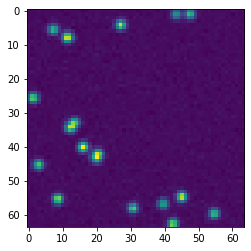

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")
    fig, img = plt.subplots(1,1)
    _ = img.imshow(images[i].cpu())

In [4]:
tile_side_length = 4
max_objects_smc = 2
pad = 2

prior = CatalogPrior(max_objects_smc,
                     img_width, img_height,
                     background_intensity/3.,
                     pad)

smc = SMCsampler(images[0], image_attributes, tile_side_length, prior,
                 max_objects = max_objects_smc, catalogs_per_block = 200,
                 kernel_num_iters = 100, product_form_multiplier = 500,
                 max_smc_iters = 500)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()

True count: 18
True total flux: 1165538.25

Starting the tile samplers...
iteration 5, temperature = 0.0016993379686027765
iteration 10, temperature = 0.013341212645173073
iteration 15, temperature = 0.0919261947274208
iteration 20, temperature = 0.759225606918335
Done!

Combining the results...
Done!

Pruning detections...
Done!

summary
number of SMC iterations: 20
posterior mean count: 17.744298934936523
posterior mean total flux: 1118558.25



